In [28]:
import pandas as pd

rainfall_data = pd.read_csv("rainfall_area-wt_India_1901-2015.csv")

print(rainfall_data.head())

  REGION  YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL    AUG    SEP  \
0  INDIA  1901  34.7  37.7  18.0  39.3  50.8  113.4  242.2  272.9  124.4   
1  INDIA  1902   7.4   4.3  19.0  43.5  48.3  108.8  284.0  199.7  201.5   
2  INDIA  1903  17.0   8.3  31.3  17.1  59.5  118.3  297.0  270.4  199.1   
3  INDIA  1904  14.4   9.6  31.8  33.1  72.4  164.8  261.0  206.4  129.6   
4  INDIA  1905  25.3  20.9  42.7  33.7  55.7   93.3  252.8  200.8  178.4   

     OCT   NOV   DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
0   52.7  38.0   8.3  1032.3     72.4    108.1    752.8     99.0  
1   61.5  27.9  24.4  1030.2     11.7    110.8    794.0    113.8  
2  117.9  36.9  17.7  1190.5     25.3    107.9    884.8    172.5  
3   69.0  11.2  16.3  1019.8     24.0    137.4    761.8     96.6  
4   51.4   9.7  10.5   975.3     46.2    132.2    725.4     71.6  


In [29]:
import plotly.graph_objects as go
import plotly.express as px

# analyze trends in annual rainfall over time
annual_rainfall = rainfall_data[['YEAR', 'ANNUAL']]

fig_annual = go.Figure()
fig_annual.add_trace(go.Scatter(
    x=annual_rainfall['YEAR'],
    y=annual_rainfall['ANNUAL'],
    mode='lines',
    name='Annual Rainfall',
    line=dict(color='blue', width=2),
    opacity=0.7
))
fig_annual.add_trace(go.Scatter(
    x=annual_rainfall['YEAR'],
    y=[annual_rainfall['ANNUAL'].mean()] * len(annual_rainfall),
    mode='lines',
    name='Mean Rainfall',
    line=dict(color='red', dash='dash')
))
fig_annual.update_layout(
    title='Trend in Annual Rainfall in India (1901-2015)',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    legend=dict(title="Legend"),
    height=500
)
fig_annual.show()

In [30]:
# identify months with the highest and lowest rainfall on average
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_avg = rainfall_data[monthly_columns].mean()

highest_rainfall_month = monthly_avg.idxmax()
lowest_rainfall_month = monthly_avg.idxmin()

fig_monthly = px.bar(
    x=monthly_avg.index,
    y=monthly_avg.values,
    labels={'x': 'Month', 'y': 'Rainfall (mm)'},
    title='Average Monthly Rainfall in India (1901-2015)',
    text=monthly_avg.values
)
fig_monthly.add_hline(
    y=monthly_avg.mean(),
    line_dash="dash",
    line_color="red",
    annotation_text="Mean Rainfall",
    annotation_position="top right"
)
fig_monthly.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1)
fig_monthly.update_layout(template='plotly_white', height=500)
fig_monthly.show()

In [31]:
# seasonal rainfall distribution
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_avg = rainfall_data[seasonal_columns].mean()

fig_seasonal = px.bar(
    x=seasonal_avg.index,
    y=seasonal_avg.values,
    labels={'x': 'Season', 'y': 'Rainfall (mm)'},
    title='Seasonal Rainfall Distribution in India (1901-2015)',
    text=seasonal_avg.values,
    color=seasonal_avg.values,
    color_continuous_scale=['gold', 'skyblue', 'green', 'orange']
)

fig_seasonal.update_traces(marker_line_color='black', marker_line_width=1)
fig_seasonal.update_layout(
    template='plotly_white',
    height=500,
    coloraxis_colorbar=dict(title='mm')
)
fig_seasonal.update_layout(template='plotly_white', height=500)
fig_seasonal.show()

In [32]:
# calculating rolling averages to assess climate change impact
rainfall_data['10-Year Rolling Avg'] = rainfall_data['ANNUAL'].rolling(window=10).mean()

fig_climate_change = go.Figure()

fig_climate_change.add_trace(go.Scatter(
    x=rainfall_data['YEAR'],
    y=rainfall_data['ANNUAL'],
    mode='lines',
    name='Annual Rainfall',
    line=dict(color='blue', width=2),
    opacity=0.6
))

fig_climate_change.add_trace(go.Scatter(
    x=rainfall_data['YEAR'],
    y=rainfall_data['10-Year Rolling Avg'],
    mode='lines',
    name='10-Year Rolling Avg',
    line=dict(color='red', width=3)
))

fig_climate_change.update_layout(
    title='Impact of Climate Change on Rainfall Patterns (1901-2015)',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    legend=dict(title="Legend"),
    height=500
)

fig_climate_change.show()

In [33]:
from scipy.stats import pearsonr

# identifying drought and extreme rainfall years
mean_rainfall = rainfall_data['ANNUAL'].mean()
std_dev_rainfall = rainfall_data['ANNUAL'].std()

drought_years = rainfall_data[rainfall_data['ANNUAL'] < (mean_rainfall - 1.5 * std_dev_rainfall)]
extreme_rainfall_years = rainfall_data[rainfall_data['ANNUAL'] > (mean_rainfall + 1.5 * std_dev_rainfall)]

# correlating seasonal rainfall with annual rainfall totals
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_correlations = {
    season: pearsonr(rainfall_data[season], rainfall_data['ANNUAL'])[0] for season in seasonal_columns
}

# displaying results for drought/extreme years and correlations
drought_years_summary = drought_years[['YEAR', 'ANNUAL']].reset_index(drop=True)
extreme_rainfall_years_summary = extreme_rainfall_years[['YEAR', 'ANNUAL']].reset_index(drop=True)
seasonal_correlations_summary = pd.DataFrame.from_dict(seasonal_correlations, orient='index', columns=['Correlation'])

drought_years_summary, extreme_rainfall_years_summary, seasonal_correlations_summary

(   YEAR  ANNUAL
 0  1905   975.3
 1  1965   938.4
 2  1972   948.5
 3  2002   920.8
 4  2009   959.3,
    YEAR  ANNUAL
 0  1917  1480.3
 1  1933  1393.5
 2  1956  1386.2
 3  1959  1382.1
 4  1961  1403.0
 5  1988  1351.0
 6  1990  1400.6,
          Correlation
 Jan-Feb     0.228913
 Mar-May     0.313057
 Jun-Sep     0.930027
 Oct-Dec     0.531648)

In [34]:
from sklearn.ensemble import IsolationForest

# detect anomalous rainfall years based on annual data
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
rainfall_data['Annual_Anomaly'] = isolation_forest.fit_predict(rainfall_data[['ANNUAL']])

# identify anomalies in annual rainfall
annual_anomalies = rainfall_data[rainfall_data['Annual_Anomaly'] == -1]

# detect anomalous months based on monthly data
monthly_data = rainfall_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
monthly_anomalies = isolation_forest.fit_predict(monthly_data)

# add anomaly detection results for months
rainfall_data['Monthly_Anomaly'] = monthly_anomalies
monthly_anomalies_df = rainfall_data[rainfall_data['Monthly_Anomaly'] == -1][['YEAR'] + monthly_columns]

fig_annual_anomalies = go.Figure()

fig_annual_anomalies.add_trace(go.Scatter(
    x=rainfall_data['YEAR'],
    y=rainfall_data['ANNUAL'],
    mode='lines',
    name='Annual Rainfall',
    line=dict(color='blue', width=2),
    opacity=0.6
))

fig_annual_anomalies.add_trace(go.Scatter(
    x=annual_anomalies['YEAR'],
    y=annual_anomalies['ANNUAL'],
    mode='markers',
    name='Anomalous Years',
    marker=dict(color='red', size=8, symbol='circle')
))

fig_annual_anomalies.add_hline(
    y=rainfall_data['ANNUAL'].mean(),
    line_dash='dash',
    line_color='green',
    annotation_text='Mean Rainfall',
    annotation_position='bottom right'
)

fig_annual_anomalies.update_layout(
    title='Annual Rainfall Anomalies in India (1901-2015)',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    legend=dict(title="Legend"),
    height=500
)

fig_annual_anomalies.show()

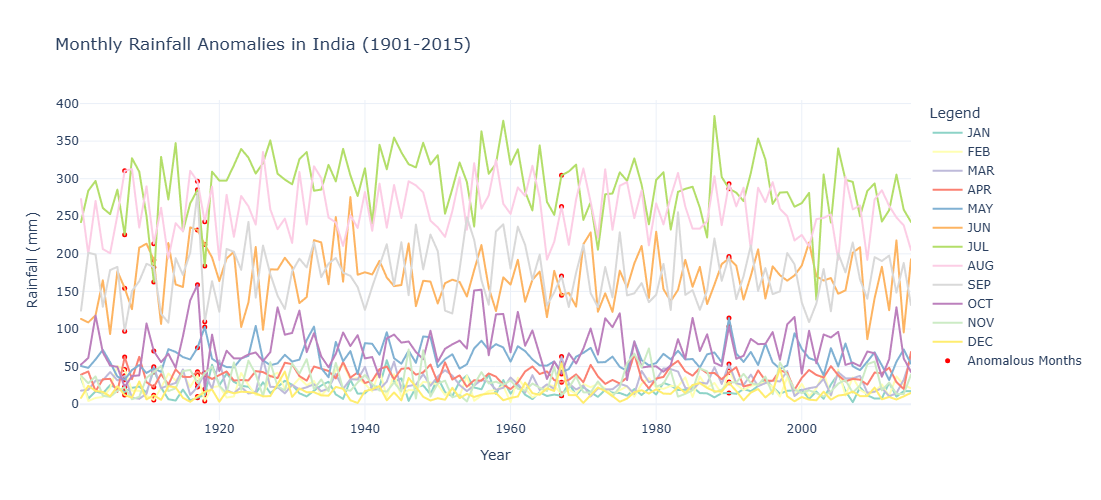

In [35]:
# preparing data for monthly anomalies
monthly_anomalies = []
for column in monthly_columns:
    for _, row in monthly_anomalies_df.iterrows():
        monthly_anomalies.append({'Year': row['YEAR'], 'Month': column, 'Rainfall': row[column]})

monthly_anomalies_df_long = pd.DataFrame(monthly_anomalies)

fig_monthly_anomalies = px.line(
    rainfall_data,
    x='YEAR',
    y=monthly_columns,
    labels={'YEAR': 'Year', 'value': 'Rainfall (mm)', 'variable': 'Month'},
    title='Monthly Rainfall Anomalies in India (1901-2015)',
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig_monthly_anomalies.add_trace(go.Scatter(
    x=monthly_anomalies_df_long['Year'],
    y=monthly_anomalies_df_long['Rainfall'],
    mode='markers',
    name='Anomalous Months',
    marker=dict(color='red', size=5, symbol='circle')
))

fig_monthly_anomalies.update_layout(
    template='plotly_white',
    legend=dict(title="Legend"),
    height=500
)

fig_monthly_anomalies.show()

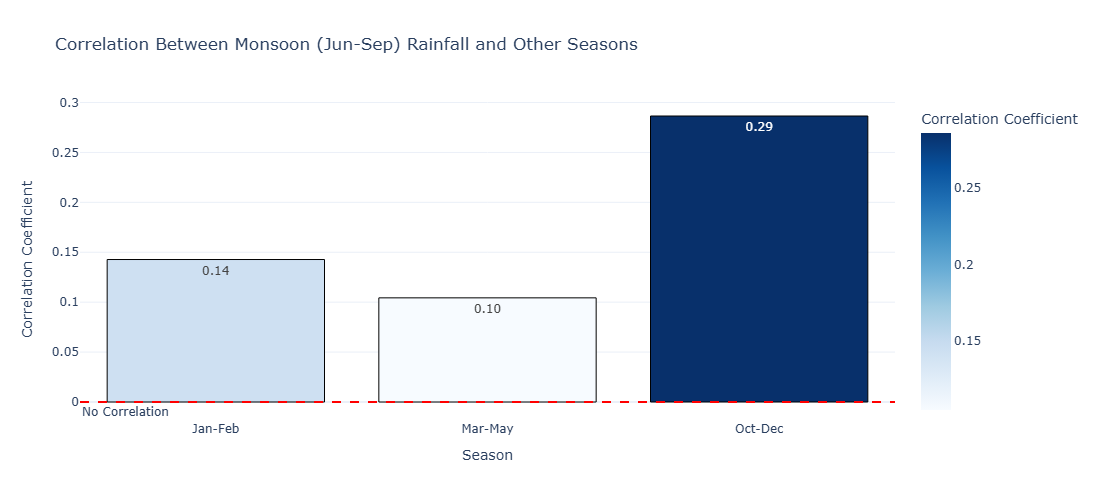

In [36]:
# correlation analysis between monsoon (Jun-Sep) rainfall and other seasons
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
monsoon_column = 'Jun-Sep'
relationships = {}

for season in seasonal_columns:
    if season != monsoon_column:
        corr, _ = pearsonr(rainfall_data[monsoon_column], rainfall_data[season])
        relationships[season] = corr

correlation_data = pd.DataFrame({
    'Season': list(relationships.keys()),
    'Correlation Coefficient': list(relationships.values())
})

fig = px.bar(
    correlation_data,
    x='Season',
    y='Correlation Coefficient',
    title='Correlation Between Monsoon (Jun-Sep) Rainfall and Other Seasons',
    labels={'Season': 'Season', 'Correlation Coefficient': 'Correlation Coefficient'},
    text='Correlation Coefficient',
    color='Correlation Coefficient',
    color_continuous_scale='Blues'
)

fig.add_hline(
    y=0,
    line_dash="dash",
    line_color="red",
    annotation_text="No Correlation",
    annotation_position="bottom left"
)

fig.update_traces(marker_line_color='black', marker_line_width=1, texttemplate='%{text:.2f}')
fig.update_layout(
    template='plotly_white',
    height=500
)

fig.show()

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



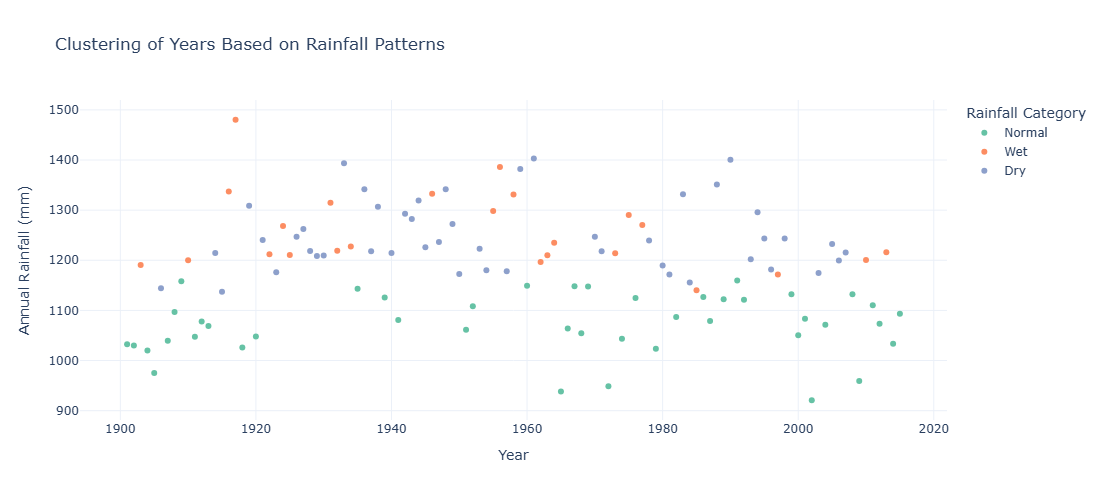

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# prepare data for clustering
rainfall_features = rainfall_data[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', 'ANNUAL']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rainfall_features)

# perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
rainfall_data['Rainfall_Cluster'] = kmeans.fit_predict(scaled_features)

# map cluster labels to categories (e.g., Dry, Normal, Wet)
cluster_labels = {0: 'Dry', 1: 'Normal', 2: 'Wet'}
rainfall_data['Rainfall_Category'] = rainfall_data['Rainfall_Cluster'].map(cluster_labels)

fig = px.scatter(
    rainfall_data,
    x='YEAR',
    y='ANNUAL',
    color='Rainfall_Category',
    title='Clustering of Years Based on Rainfall Patterns',
    labels={'YEAR': 'Year', 'ANNUAL': 'Annual Rainfall (mm)', 'Rainfall_Category': 'Rainfall Category'},
    color_discrete_sequence=px.colors.qualitative.Set2,
    hover_data={'Rainfall_Cluster': True, 'Rainfall_Category': True}
)

fig.update_layout(
    template='plotly_white',
    legend_title='Rainfall Category',
    height=500
)

fig.show()

In [50]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/13.3 MB 9.4 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/13.3 MB 10.4 MB/s eta 0:00:01
   ------------ --------------------------- 4.2/13.3 MB 9.3 MB/s eta 0:00:01
   ------------ --------------------------- 4.2/13.3 MB 9.3 MB/s eta 0:00:01
   ------------ --------------------------- 4.2/13.3 MB 9.3 MB/s eta 0:00:01
   ------------ --------------------------- 4.2/13.3 MB 9.3 MB/s eta 0:00:01
   ------------ --------------------------- 4.2/13.3 MB 9.3 MB/s eta 0:00:01
   ------------- -------------------------- 4.5/13.3 MB 2.7 MB/s eta 0:00:04
   ------------------ --------------------- 6.3/13.3 MB 3.4 MB/s eta 0:00:03
   ---------------------- ----------------- 7.6/13.3 MB 3.8 MB/s eta 0:00:02
   ----------------------------- ---------- 9.7/13.3 MB 4.3 MB/s eta 0:00:01
   ----------------------------------- ---- 11.8/13.3 MB 4.9 MB/s eta 0:00:01
   -

In [52]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


11:10:27 - cmdstanpy - INFO - Chain [1] start processing
11:10:28 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\adity\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



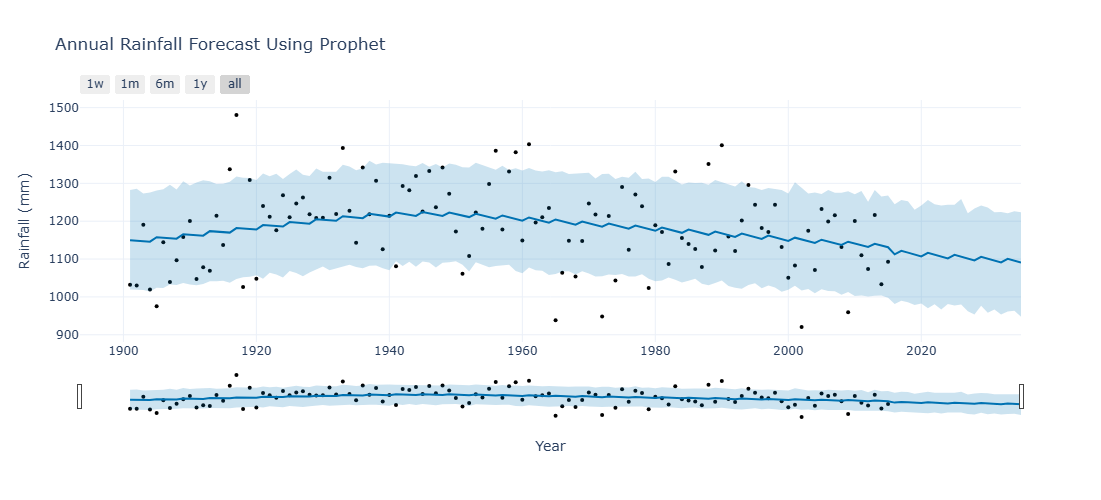

In [54]:
rainfall_data['DATE'] = pd.to_datetime(rainfall_data['YEAR'], format='%Y')
annual_rainfall_ts = rainfall_data.set_index('DATE')['ANNUAL']

# use: pip install prophet

from prophet import Prophet
# Prepare the data for Prophet
prophet_data = annual_rainfall_ts.reset_index()
prophet_data.columns = ['ds', 'y']

from prophet.plot import plot_plotly, plot_components_plotly

prophet_model = Prophet()
prophet_model.fit(prophet_data)

# create a future dataframe for the next 20 years
future = prophet_model.make_future_dataframe(periods=20, freq='Y')
forecast = prophet_model.predict(future)

fig_forecast = plot_plotly(prophet_model, forecast)

fig_forecast.update_layout(
    title='Annual Rainfall Forecast Using Prophet',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    height=500
)

fig_forecast.show()